# Varifold distances for different derivatives

In [1]:
import numpy as np
import polpo.preprocessing.dict as ppdict
from matplotlib import pyplot as plt
from polpo.mesh.surface import PvSurface
from polpo.mesh.varifold.tuning import SigmaFromLengths
from polpo.preprocessing.load.pregnancy.jacobs import MeshLoader, MeshLoaderFromMri
from polpo.preprocessing.mesh.registration import RigidAlignment

[KeOps] Warning : CUDA was detected, but driver API could not be initialized. Switching to CPU only.


TODO: more complete analysis

TODO: between subject

In [2]:
DEBUG = False

In [3]:
SUBJECT_ID = "01"
STRUCT = "L_Hipp"

SUBSAMPLE = None if not DEBUG else 3

In [4]:
sigma_search = SigmaFromLengths(
    ratio_charlen_mesh=2.0,
    ratio_charlen=0.25,
)

In [5]:
def pairwise_dists(meshes, metric):
    dists = []
    for mesh in meshes.values():
        dists_ = []
        dists.append(dists_)
        for cmp_mesh in meshes.values():
            dists_.append(metric.dist(mesh, cmp_mesh))

    return dists


def upper_tri(mat):
    return np.array(mat)[np.triu_indices(len(mat), k=1)]

## Enigma

In [6]:
mesh_loader = (
    MeshLoader(
        subject_subset=[SUBJECT_ID],
        struct_subset=[STRUCT],
        derivative="enigma",
        as_mesh=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + ppdict.Subsample(SUBSAMPLE)
    + ppdict.DictMap(PvSurface)
)

enigma_meshes = meshes = mesh_loader()

In [7]:
sigma_search.fit([ppdict.ExtractRandomKey()(meshes)])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(5.521322252586956)

In [8]:
enigma_dists = dists = pairwise_dists(meshes, metric)

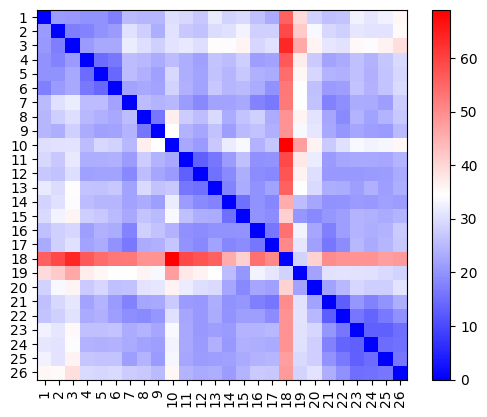

In [9]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(12.876803288362082), np.float64(69.02878034697622))

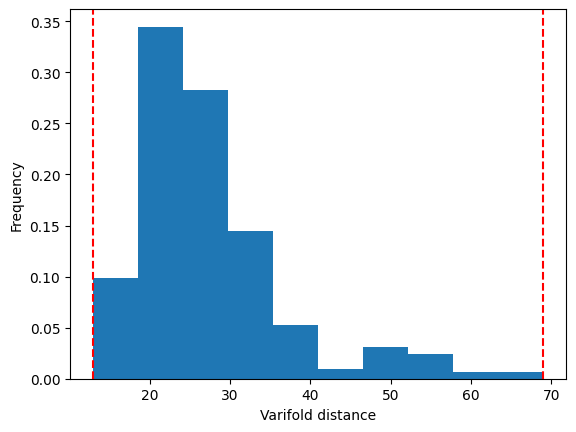

In [10]:
_, ax = plt.subplots()

dists_ = upper_tri(dists)
ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## FSL-First

In [11]:
mesh_loader = (
    MeshLoader(
        subject_subset=[SUBJECT_ID],
        struct_subset=[STRUCT],
        session_subset=enigma_meshes.keys(),
        derivative="fsl",
        as_mesh=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + RigidAlignment(known_correspondences=True)
    + ppdict.DictMap(PvSurface)
)


fsl_meshes = meshes = mesh_loader()

In [12]:
sigma_search.fit([ppdict.ExtractRandomKey()(meshes)])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(6.032296136381388)

In [13]:
fsl_dists = dists = pairwise_dists(meshes, metric)

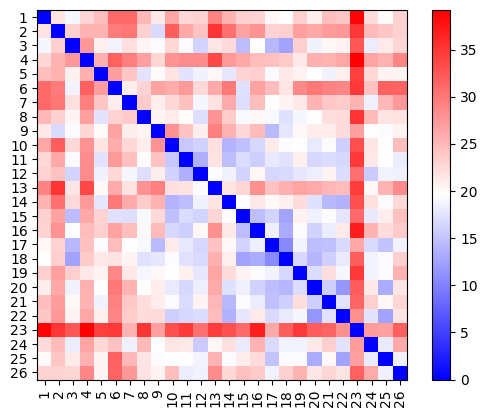

In [14]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(10.482896746834374), np.float64(39.211350793945975))

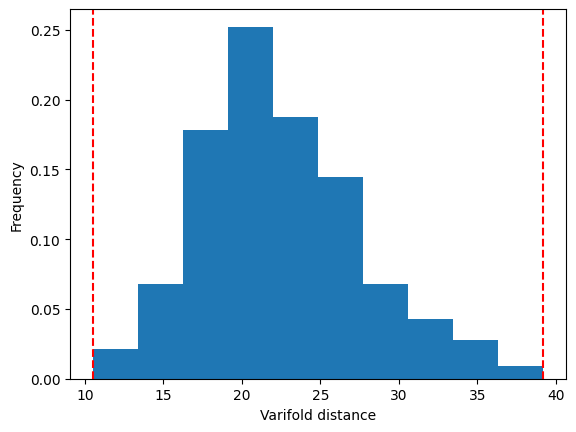

In [15]:
_, ax = plt.subplots()

dists_ = upper_tri(dists)
ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## Fast

In [16]:
mesh_loader = (
    MeshLoaderFromMri(
        subject_subset=[SUBJECT_ID],
        struct_subset=[STRUCT],
        session_subset=enigma_meshes.keys(),
        derivative="fast",
        n_jobs=-1,
        split_before_meshing=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + RigidAlignment(known_correspondences=False)
    + ppdict.DictMap(PvSurface)
)

fast_meshes = meshes = mesh_loader()

In [17]:
sigma_search.fit([ppdict.ExtractRandomKey()(meshes)])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(7.351247310638428)

In [18]:
fast_dists = dists = pairwise_dists(meshes, metric)

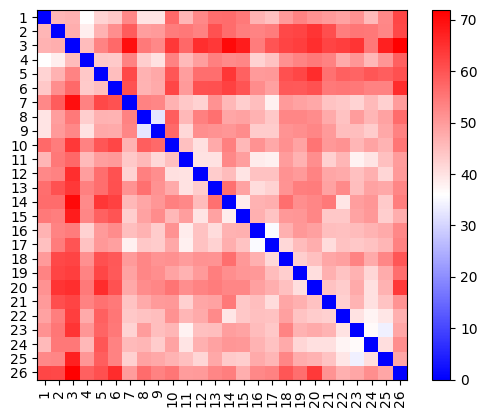

In [19]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(32.39250146655175), np.float64(71.9299274139755))

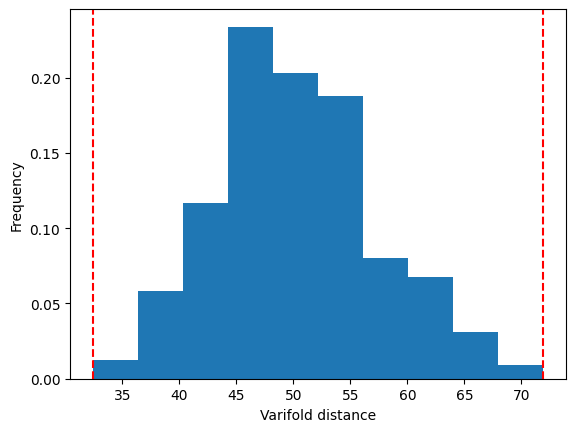

In [20]:
_, ax = plt.subplots()

dists_ = upper_tri(dists)
ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## Comparison

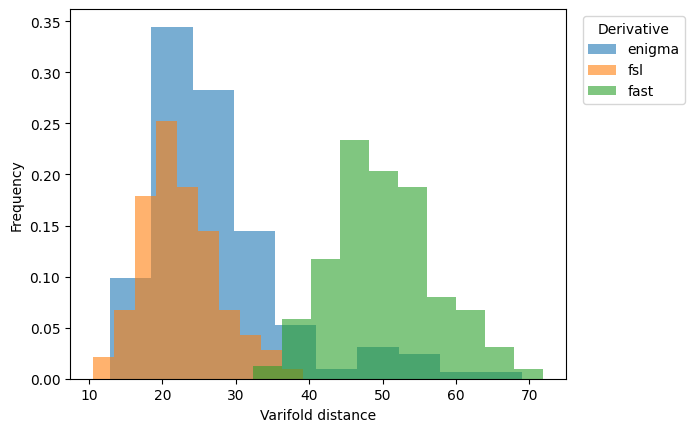

In [21]:
_, ax = plt.subplots()

for label, dists in zip(
    ("enigma", "fsl", "fast"), (enigma_dists, fsl_dists, fast_dists)
):
    dists_ = upper_tri(dists)
    ax.hist(
        dists_,
        weights=1 / len(dists_) * np.ones_like(dists_),
        alpha=0.6,
        label=label,
    )

ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

ax.legend(title="Derivative", bbox_to_anchor=(1.02, 1), loc="upper left");